In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [10]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/datawcent/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2261906130553975;1', 'DF_2261906130553975/O2hfcanddplite;1', 'DF_2261906130553975/O2hfcanddpml;1', 'DF_2261906130554103;1', 'DF_2261906130554103/O2hfcanddplite;1', 'DF_2261906130554103/O2hfcanddpml;1', 'DF_2261906130554231;1', 'DF_2261906130554231/O2hfcanddplite;1', 'DF_2261906130554231/O2hfcanddpml;1', 'DF_2261906130554359;1', 'DF_2261906130554359/O2hfcanddplite;1', 'DF_2261906130554359/O2hfcanddpml;1', 'DF_2261906130554487;1', 'DF_2261906130554487/O2hfcanddplite;1', 'DF_2261906130554487/O2hfcanddpml;1', 'DF_2261906080643575;1', 'DF_2261906080643575/O2hfcanddplite;1', 'DF_2261906080643575/O2hfcanddpml;1', 'DF_2261906080643703;1', 'DF_2261906080643703/O2hfcanddplite;1', 'DF_2261906080643703/O2hfcanddpml;1', 'DF_2261906080643831;1', 'DF_2261906080643831/O2hfcanddplite;1', 'DF_2261906080643831/O2hfcanddpml;1', 'DF_2261906080643959;1', 'DF_2261906080643959/O2hfcanddplite;1', 'DF_2261906080643959/O2hfcanddpml;1', 'DF_2261906080644087;1', 'DF_2261906080644087/O2hfcanddplite;1', 'DF_226

In [11]:
print(full_df.columns)

Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fCentrality', 'fFlagMcMatchRec', 'fOriginMcRec',
       'fFlagMcDecayChanRec'],
      dtype='object')


In [12]:
unique_values = full_df['fCentrality'].unique()
print("Unique values in fCentrality:", unique_values)

Unique values in fCentrality: [18.5  19.5  25.5  42.5  21.5  23.5  37.5  39.5  22.5  40.5  53.5  10.5
 50.5  13.5  35.5  69.5  17.5  56.5   9.65 59.5  38.5  36.5  33.5  26.5
 16.5  58.5   8.85 28.5  52.5  77.5  48.5   7.55 12.5  24.5  45.5  15.5
 11.5  47.5  89.5  27.5   1.45 63.5   1.25 14.5  31.5  54.5  49.5  43.5
 44.5  34.5   6.25 20.5   7.25 64.5  67.5  66.5   9.55 46.5  62.5  29.5
 30.5  32.5   8.95 51.5  61.5   7.35 57.5   6.95 41.5  68.5  78.5  70.5
 60.5  55.5  72.5  65.5   7.65  6.65  8.05 71.5   5.85  4.35  1.85  9.35
 80.5  75.5  74.5  84.5  73.5  79.5   2.65  7.45  3.45]


In [13]:
unique_values = full_df['fFlagMcMatchRec'].unique()
print("Unique values in fFlagMcMatchRec:", unique_values)

Unique values in fFlagMcMatchRec: [0]


In [14]:
unique_values = full_df['fFlagMcDecayChanRec'].unique()
print("Unique values in fFlagMcDecayChanRec:", unique_values)

Unique values in fFlagMcDecayChanRec: [0]


/tmp/ipykernel_814355/2406445017.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


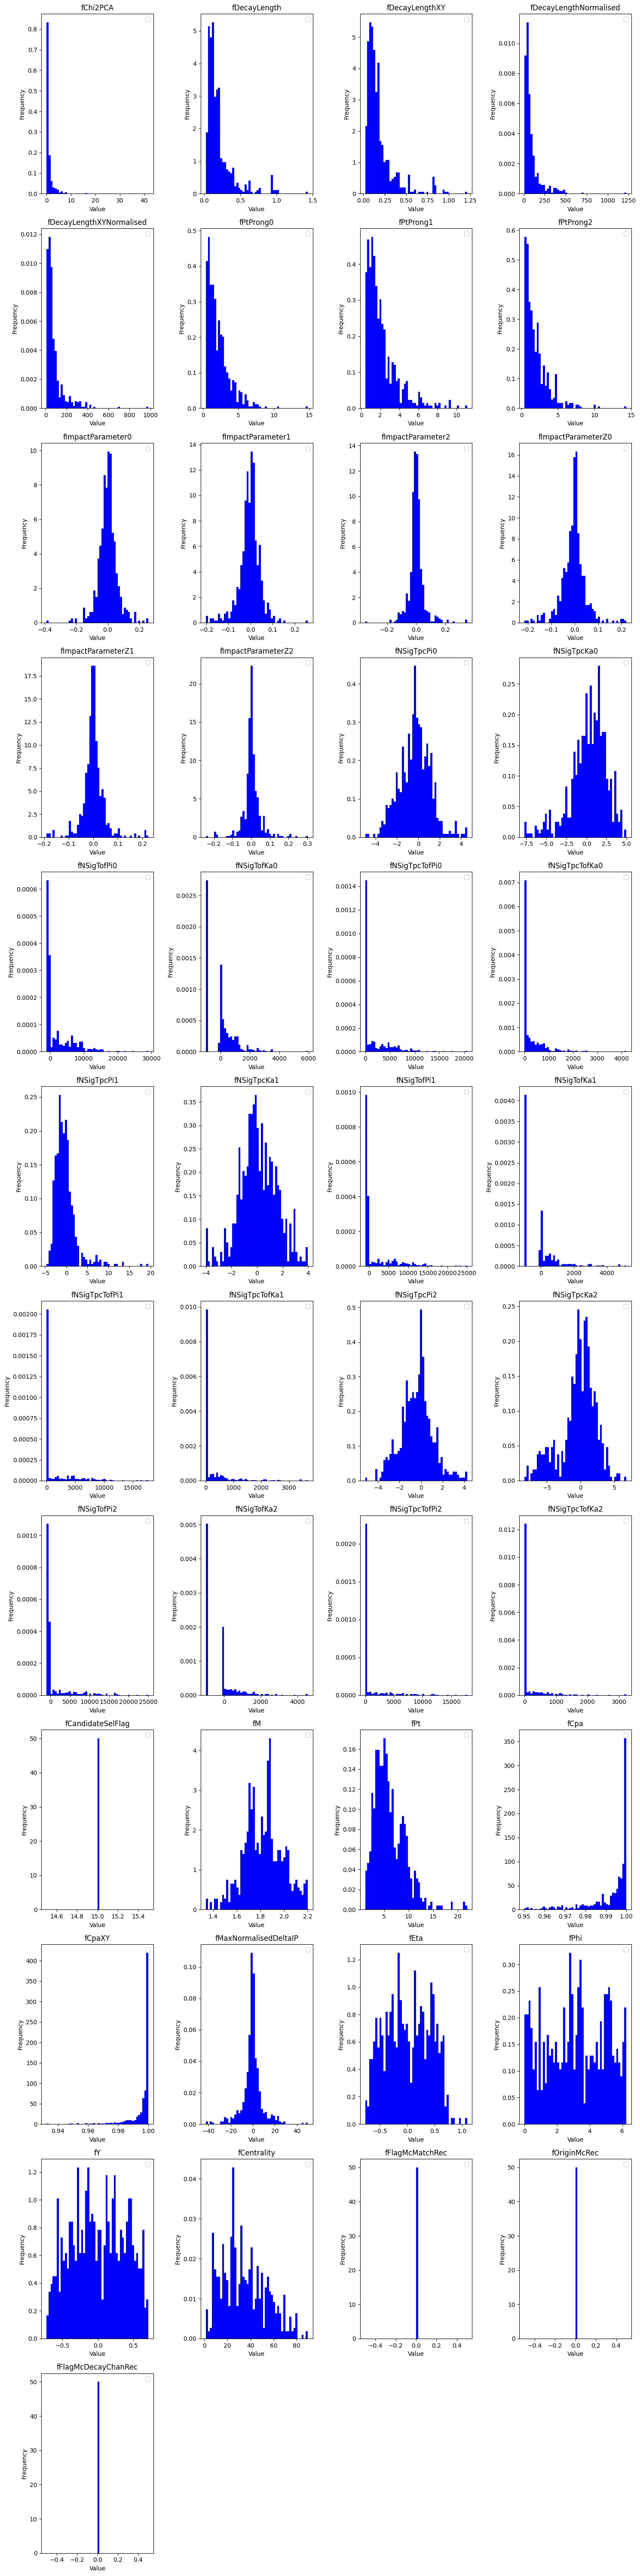

In [15]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    axes[i].hist(full_df[column], bins=50, color='blue', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

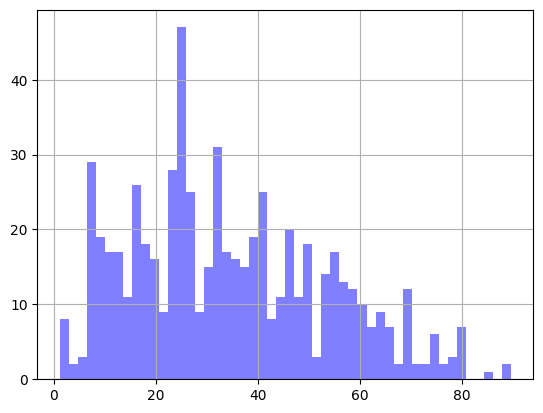

In [16]:
full_df['fCentrality'].hist(bins=50, color='blue', alpha=0.5, label='Matched')